In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

In [51]:
data = pd.read_csv(r"C:\Users\suraf\Downloads\diabetes_data.csv")
print(data.head())

     id   chol  stab.glu   hdl  ratio  glyhb    location  age  gender  height  \
0  1000  203.0        82  56.0    3.6   4.31  Buckingham   46  female    62.0   
1  1001  165.0        97  24.0    6.9   4.44  Buckingham   29  female    64.0   
2  1002  228.0        92  37.0    6.2   4.64  Buckingham   58  female    61.0   
3  1003   78.0        93  12.0    6.5   4.63  Buckingham   67    male    67.0   
4  1005  249.0        90  28.0    8.9   7.72  Buckingham   64    male    68.0   

   weight   frame  bp.1s  bp.1d  bp.2s  bp.2d  waist   hip  time.ppn  
0   121.0  medium  118.0   59.0    NaN    NaN   29.0  38.0     720.0  
1   218.0   large  112.0   68.0    NaN    NaN   46.0  48.0     360.0  
2   256.0   large  190.0   92.0  185.0   92.0   49.0  57.0     180.0  
3   119.0   large  110.0   50.0    NaN    NaN   33.0  38.0     480.0  
4   183.0  medium  138.0   80.0    NaN    NaN   44.0  41.0     300.0  


In [53]:
print("Data Types:")
print(data.dtypes)
print("\n")

Data Types:
id            int64
chol        float64
stab.glu      int64
hdl         float64
ratio       float64
glyhb       float64
location     object
age           int64
gender       object
height      float64
weight      float64
frame        object
bp.1s       float64
bp.1d       float64
bp.2s       float64
bp.2d       float64
waist       float64
hip         float64
time.ppn    float64
dtype: object




In [55]:
print("Summary Statistics:")
print(data.describe())
print("\n")

Summary Statistics:
                 id        chol    stab.glu         hdl       ratio  \
count    403.000000  402.000000  403.000000  402.000000  402.000000   
mean   15978.310174  207.845771  106.672457   50.445274    4.521642   
std    11881.122124   44.445557   53.076655   17.262626    1.727886   
min     1000.000000   78.000000   48.000000   12.000000    1.500000   
25%     4792.500000  179.000000   81.000000   38.000000    3.200000   
50%    15766.000000  204.000000   89.000000   46.000000    4.200000   
75%    20336.000000  230.000000  106.000000   59.000000    5.400000   
max    41756.000000  443.000000  385.000000  120.000000   19.299999   

            glyhb         age      height      weight       bp.1s       bp.1d  \
count  390.000000  403.000000  398.000000  402.000000  398.000000  398.000000   
mean     5.589769   46.851117   66.020101  177.592040  136.904523   83.321608   
std      2.242595   16.312333    3.918515   40.340666   22.741033   13.589227   
min      2.68000

In [57]:
categorical_columns = data.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {data[col].unique()}")
print("\n")

Unique values in location: ['Buckingham' 'Louisa']
Unique values in gender: ['female' 'male']
Unique values in frame: ['medium' 'large' 'small' nan]




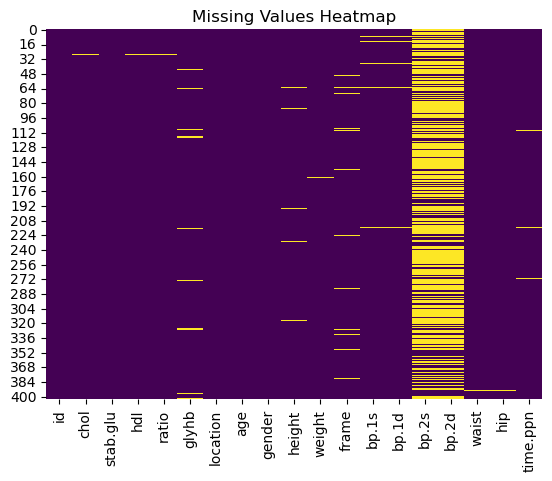

In [59]:
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [61]:
if data.duplicated().sum() > 0:
    data = data.drop_duplicates()

In [63]:
features_num = ['chol', 'stab.glu', 'hdl', 'ratio', 'age', 'height', 'bp.1s', 'bp.1d', 'time.ppn', 'weight', 'waist', 'hip']
features_cat = ['gender', 'location', 'frame']
target = 'glyhb'

In [65]:
print(data.isnull().sum())

id            0
chol          1
stab.glu      0
hdl           1
ratio         1
glyhb        13
location      0
age           0
gender        0
height        5
weight        1
frame        12
bp.1s         5
bp.1d         5
bp.2s       262
bp.2d       262
waist         2
hip           2
time.ppn      3
dtype: int64


In [67]:
data1 = data.drop(columns=["bp.2s", "bp.2d"], axis=1)
data1['frame'] = data1['frame'].fillna('medium')

In [69]:
columns_to_fill = ["chol", "hdl", "ratio", "height", "weight", "bp.1s", "bp.1d", "waist", "hip", "time.ppn","glyhb"]
for col in columns_to_fill:
    mean_value = data1[col].mean()
    data1[col] = data1[col].fillna(mean_value)

In [71]:
corr_matrix = data1[features_num + [target]].corr()

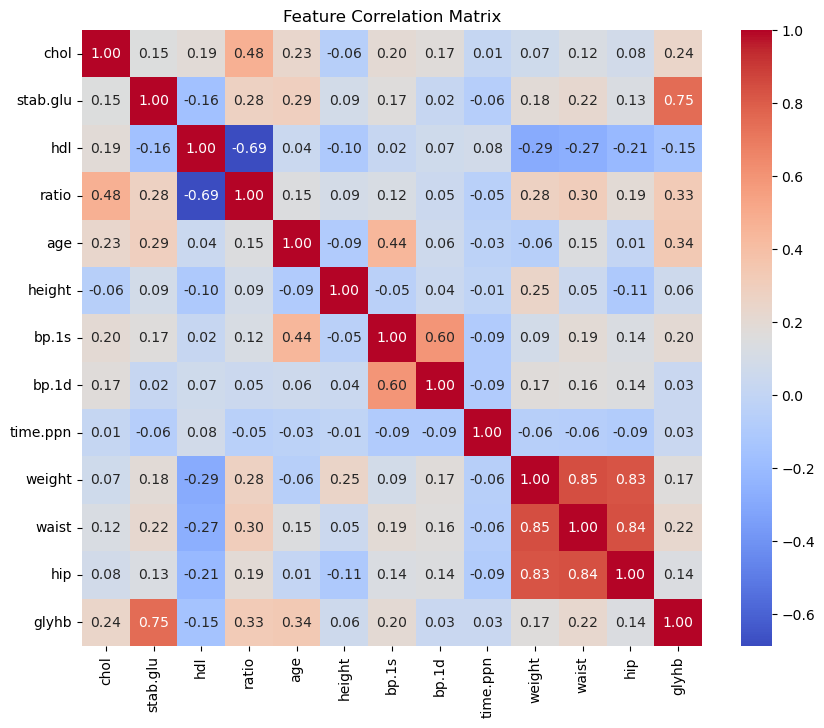

In [73]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [75]:
data1['gender'] = data1['gender'].map({'male': 0, 'female': 1})

In [77]:
data1['location'] = data1['location'].map({'Buckingham': 0, 'Louisa': 1})

In [79]:
data1


,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.310000,0,46,1,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.440000,0,29,1,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.640000,0,58,1,61.0,256.0,large,190.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.630000,0,67,0,67.0,119.0,large,110.0,50.0,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.720000,0,64,0,68.0,183.0,medium,138.0,80.0,44.0,41.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,41506,296.0,369,46.0,6.4,16.110001,1,53,0,69.0,173.0,medium,138.0,94.0,35.0,39.0,210.0
399,41507,284.0,89,54.0,5.3,4.390000,1,51,1,63.0,154.0,medium,140.0,100.0,32.0,43.0,180.0
400,41510,194.0,269,38.0,5.1,13.630000,1,29,1,69.0,167.0,small,120.0,70.0,33.0,40.0,20.0
401,41752,199.0,76,52.0,3.8,4.490000,1,41,1,63.0,197.0,medium,120.0,78.0,41.0,48.0,255.0


In [81]:
encoder = OrdinalEncoder(categories=[['small', 'medium', 'large']])

In [83]:
data1['frame'] = encoder.fit_transform(data1[['frame']])

In [85]:
features = ['stab.glu', 'ratio', 'age']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features),  # Scale numerical features
    ])

In [87]:
features = ['stab.glu', 'ratio', 'age']
target = 'glyhb'

In [89]:
X = data1[features]
y = data1[target]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [93]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [95]:
linear_model = LinearRegression()
linear_model.fit(X_train_scale, y_train)

LinearRegression()

In [97]:
y_pred = linear_model.predict(X_test_scale)

In [99]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [101]:
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 1.3078615804803573
R² Score: 0.7353325998544951


In [103]:
min_value = data1[target].min()
max_value = data1[target].max()

# Calculate the range
range = max_value - min_value

In [105]:
range

13.4300005436

In [107]:
coef = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coef'])
print(coef)

              Coef
stab.glu  1.455824
ratio     0.254177
age       0.217437


In [109]:
numerical_features = features_num
categorical_features = features_cat

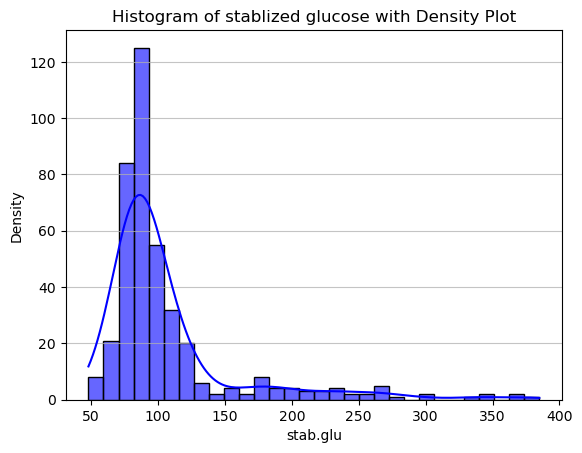

In [111]:
sns.histplot(data1['stab.glu'], bins=30, kde=True, color='blue', alpha=0.6)
plt.title('Histogram of stablized glucose with Density Plot')
plt.xlabel('stab.glu')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:


# Select features for multicollinearity check
features = ['stab.glu', 'ratio', 'age']
X = data1[features]

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

TypeError: 'float' object is not callable

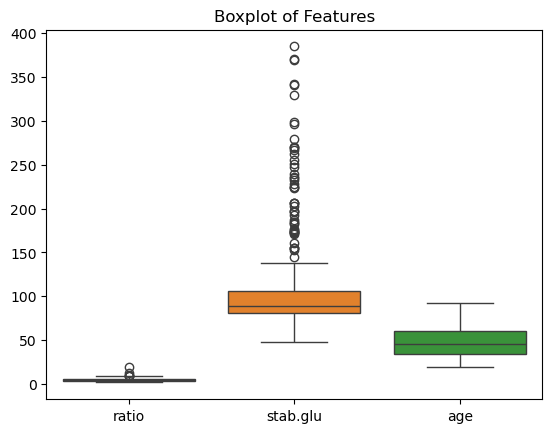

In [117]:
###### plt.figure(figsize=(12, 6))
sns.boxplot(data=X[["ratio", "stab.glu",'age']])
plt.title("Boxplot of Features")
plt.show()

In [119]:
#classification

In [121]:
# Assuming 'data' is your DataFrame and it already contains a column 'glyhb'
threshold_value = 6.5  # Example threshold for diabetes

In [123]:
# Create a binary target variable for diabetes
data1['diabetes'] = (data1['glyhb'] > threshold_value).astype(int)

In [125]:
data1

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn,diabetes
0,1000,203.0,82,56.0,3.6,4.310000,0,46,1,62.0,121.0,1.0,118.0,59.0,29.0,38.0,720.0,0
1,1001,165.0,97,24.0,6.9,4.440000,0,29,1,64.0,218.0,2.0,112.0,68.0,46.0,48.0,360.0,0
2,1002,228.0,92,37.0,6.2,4.640000,0,58,1,61.0,256.0,2.0,190.0,92.0,49.0,57.0,180.0,0
3,1003,78.0,93,12.0,6.5,4.630000,0,67,0,67.0,119.0,2.0,110.0,50.0,33.0,38.0,480.0,0
4,1005,249.0,90,28.0,8.9,7.720000,0,64,0,68.0,183.0,1.0,138.0,80.0,44.0,41.0,300.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,41506,296.0,369,46.0,6.4,16.110001,1,53,0,69.0,173.0,1.0,138.0,94.0,35.0,39.0,210.0,1
399,41507,284.0,89,54.0,5.3,4.390000,1,51,1,63.0,154.0,1.0,140.0,100.0,32.0,43.0,180.0,0
400,41510,194.0,269,38.0,5.1,13.630000,1,29,1,69.0,167.0,0.0,120.0,70.0,33.0,40.0,20.0,1
401,41752,199.0,76,52.0,3.8,4.490000,1,41,1,63.0,197.0,1.0,120.0,78.0,41.0,48.0,255.0,0


In [127]:
X = data1.drop(columns=['glyhb', 'diabetes','id'])  # Features
y = data1['diabetes']  # Target

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [131]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [133]:
from sklearn.linear_model import LogisticRegression

# Step 4: Train Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [135]:
y_pred = logistic_model.predict(X_test_scaled)

In [137]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display Results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9629629629629629
Confusion Matrix:
[[69  0]
 [ 3  9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        69
           1       1.00      0.75      0.86        12

    accuracy                           0.96        81
   macro avg       0.98      0.88      0.92        81
weighted avg       0.96      0.96      0.96        81



In [139]:
log_reg = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.236420
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                  322
Model:                          Logit   Df Residuals:                      306
Method:                           MLE   Df Model:                           15
Date:                Wed, 26 Feb 2025   Pseudo R-squ.:                  0.4713
Time:                        18:55:48   Log-Likelihood:                -76.127
converged:                       True   LL-Null:                       -144.00
Covariance Type:            nonrobust   LLR p-value:                 1.581e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.5533      7.060     -1.070      0.285     -21.391       6.285
chol           0.0092      0.

Optimization terminated successfully.
         Current function value: 0.211020
         Iterations 8


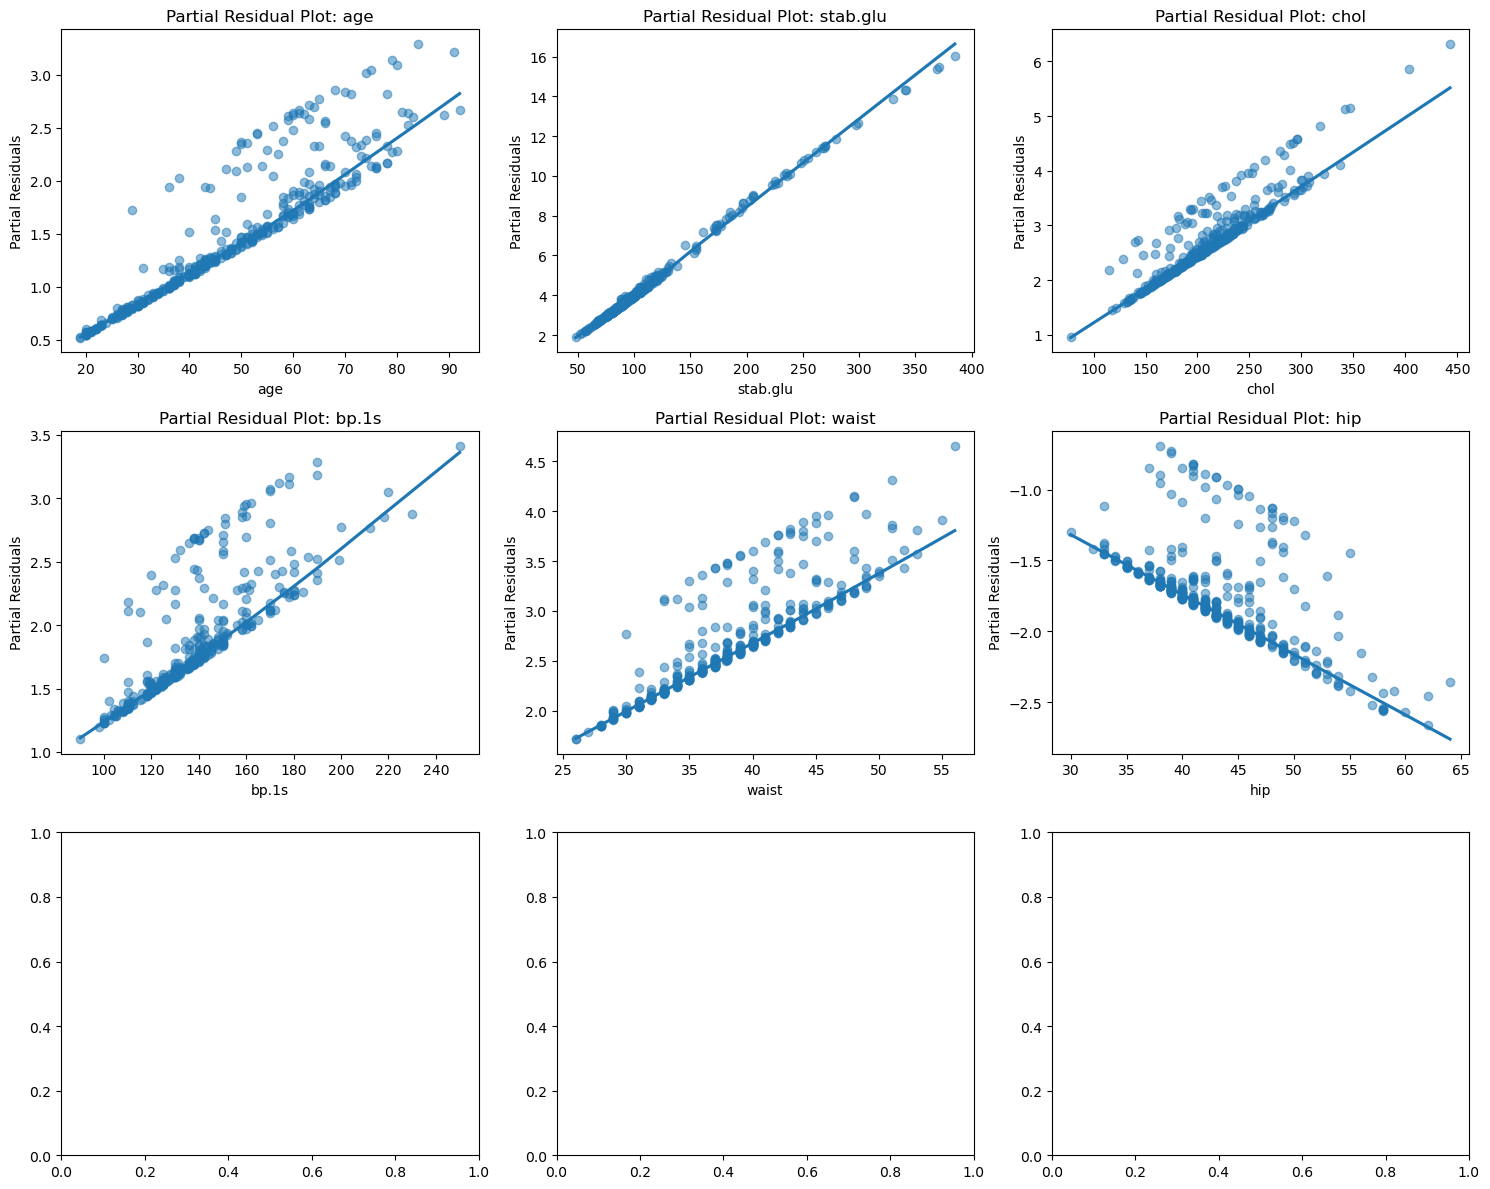

In [141]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fit logistic regression model
X_const = sm.add_constant(X)  # Add constant for intercept
logit_model = sm.Logit(y, X_const).fit()

# Get predicted log-odds
log_odds = logit_model.predict(X_const)

# Plot partial residuals for each predictor
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # Adjust grid based on number of features
for i, col in enumerate(["age", "stab.glu", "chol", "bp.1s", "waist", "hip"]):  # Choose continuous variables
    row, col_idx = divmod(i, 3)
    
    # Compute partial residuals
    partial_residuals = X[col] * logit_model.params[col] + log_odds
    
    # Plot
    sns.regplot(x=X[col], y=partial_residuals, ax=axes[row, col_idx], lowess=True, scatter_kws={"alpha": 0.5})
    axes[row, col_idx].set_title(f"Partial Residual Plot: {col}")
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel("Partial Residuals")

plt.tight_layout()
plt.show()

In [142]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]

print(vif_data)

TypeError: 'float' object is not callable

In [144]:
log_reg = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.236420
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                  322
Model:                          Logit   Df Residuals:                      306
Method:                           MLE   Df Model:                           15
Date:                Wed, 26 Feb 2025   Pseudo R-squ.:                  0.4713
Time:                        18:55:52   Log-Likelihood:                -76.127
converged:                       True   LL-Null:                       -144.00
Covariance Type:            nonrobust   LLR p-value:                 1.581e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.5533      7.060     -1.070      0.285     -21.391       6.285
chol           0.0092      0.

In [146]:
from statsmodels.stats.stattools import durbin_watson

# Compute Durbin-Watson statistic
dw_stat = durbin_watson(log_reg.resid_response)
print("Durbin-Watson Statistic:", dw_stat)

Durbin-Watson Statistic: 2.0564040479578565


In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9629629629629629
Precision: 1.0
Recall: 0.75
F1 Score: 0.8571428571428571
